 # Basic survival analysis

In [170]:
import pathlib
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import multivariate_logrank_test
import pandas as pd
import matplotlib.pyplot as plt
from tcga_brca_clinical import conf, io

import warnings
warnings.filterwarnings('ignore')

In [171]:
data = io.read_data(pathlib.Path("../data").joinpath(conf.PREPROCESSED_FILENAME))
data.set_index("case_id", inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 1081 entries, 001cef41-ff86-4d3f-a140-a647ac4b10a1 to ff0f875f-113a-4c0f-8c0a-4259cd496e6d
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   age_at_index                 1081 non-null   Int64   
 1   days_to_birth                1066 non-null   Int64   
 2   days_to_death                150 non-null    Int64   
 3   ethnicity                    1081 non-null   category
 4   race                         1081 non-null   category
 5   vital_status                 1081 non-null   category
 6   year_of_birth                1078 non-null   Int64   
 7   year_of_death                103 non-null    Int64   
 8   age_at_diagnosis             1081 non-null   float64 
 9   ajcc_pathologic_m            1081 non-null   category
 10  ajcc_pathologic_n            1081 non-null   category
 11  ajcc_pathologic_stage        1081 non-null   cat

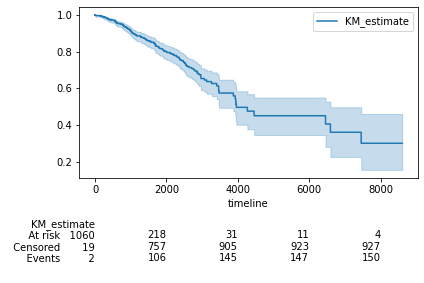

In [125]:
kmf = KaplanMeierFitter().fit(durations=data["survival_days"], event_observed=data["observed_death"])
kmf.plot_survival_function(at_risk_counts=True)
plt.tight_layout()

### Comparing survival depending on different features

1. `age_at_diagnosis`
2. `tumor_stage`
3. `race`
4. `treatment` 
5. `ajcc_pathologic_m` (metastase)

In [175]:
features_to_compare = [
    "tumor_stage",
    "race",
    "ajcc_pathologic_m",
    "age_at_diagnosis_binned",
    "pharmaceutical_therapy_nos",
    "radiation_therapy_nos",
]


def basic_survival_analysis(data: pd.DataFrame, group_name: str) -> None:
    kmf = KaplanMeierFitter()
    plt.figure(figsize=(16, 8))

    for name, grouped_df in data.groupby(by=group_name):
        kmf.fit(
            grouped_df["survival_days"].astype(float),
            grouped_df["observed_death"],
            label=name,
        )

        # plt.figure(figsize=(10, 8))
        ax = plt.subplot(111)
        ax.set_title(f"Kaplan-Meier survival for {group_name}")
        kmf.plot_survival_function(ax=ax, ci_show=False)

    plt.show()

    results = multivariate_logrank_test(
        event_durations=data["survival_days"],
        groups=data[group_name],
        events_observed=data["observed_death"],
    )
    print(f"log-rank test for {group_name}")
    results.print_summary()


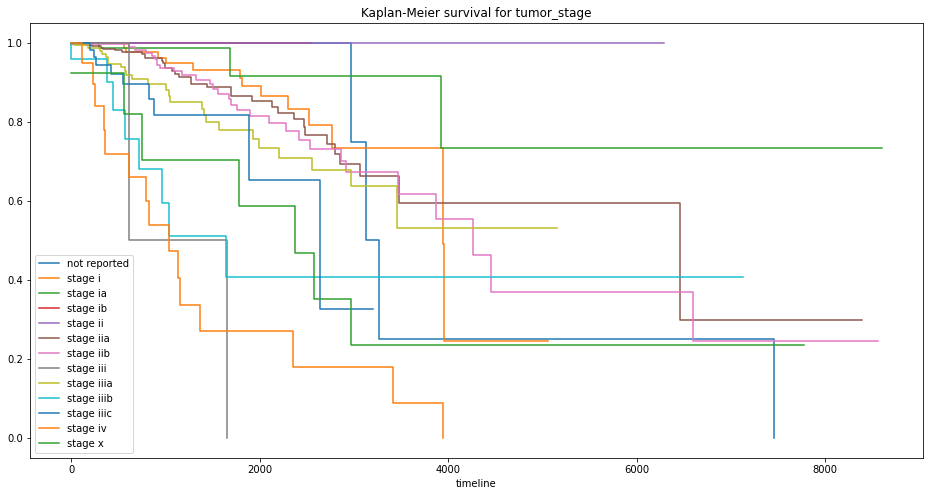

log-rank test for tumor_stage


<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 12
   events_observed = case_id
001cef41-ff86-4d3f-a140-a647ac4b10a1    0
0045349c-69d9-4306-a403-c9c1fa836644    0
00807dae-9f4a-4fd1-aac2-82eb11bf2afb    0
00a2d166-78c9-4687-a195-3d6315c27574    0
00b11ca8-8540-4a3d-b602-ec754b00230b    0
                                       ..
fe15c48b-116d-461e-9b40-68514730fd18    0
fe2cd610-aa52-4789-ac62-7683281bb22f    0
fe7f74b8-20f4-4471-91dc-4cca8c68e5c0    0
fec0da58-1047-44d2-b6d1-c18cceed43dc    0
ff0f875f-113a-4c0f-8c0a-4259cd496e6d    0
Name: observed_death, Length: 1081, dtype: int64
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
          36.21 <0.005     11.71

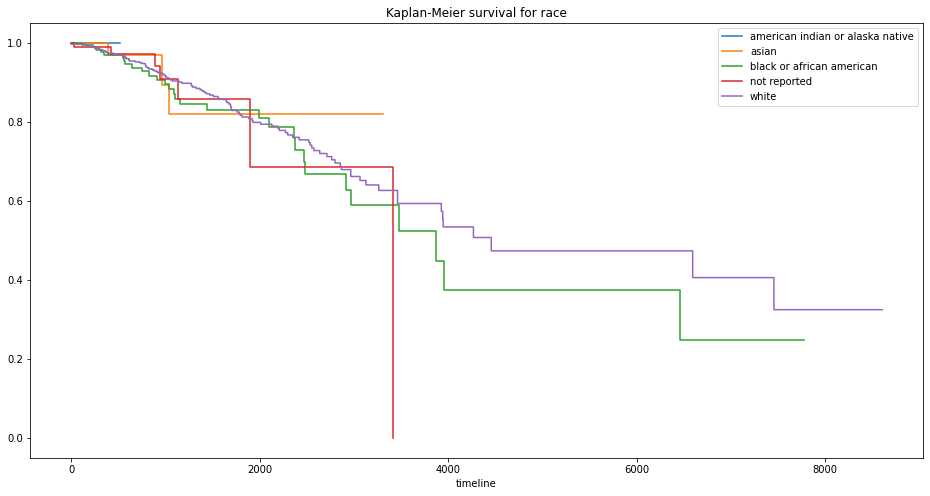

log-rank test for race


<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 4
   events_observed = case_id
001cef41-ff86-4d3f-a140-a647ac4b10a1    0
0045349c-69d9-4306-a403-c9c1fa836644    0
00807dae-9f4a-4fd1-aac2-82eb11bf2afb    0
00a2d166-78c9-4687-a195-3d6315c27574    0
00b11ca8-8540-4a3d-b602-ec754b00230b    0
                                       ..
fe15c48b-116d-461e-9b40-68514730fd18    0
fe2cd610-aa52-4789-ac62-7683281bb22f    0
fe7f74b8-20f4-4471-91dc-4cca8c68e5c0    0
fec0da58-1047-44d2-b6d1-c18cceed43dc    0
ff0f875f-113a-4c0f-8c0a-4259cd496e6d    0
Name: observed_death, Length: 1081, dtype: int64
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
          69.74 <0.005     45.14

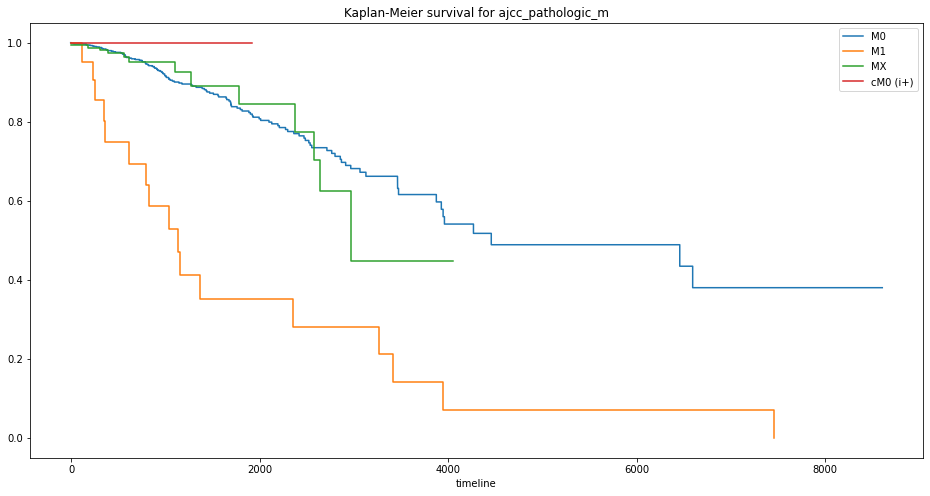

log-rank test for ajcc_pathologic_m


<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 3
   events_observed = case_id
001cef41-ff86-4d3f-a140-a647ac4b10a1    0
0045349c-69d9-4306-a403-c9c1fa836644    0
00807dae-9f4a-4fd1-aac2-82eb11bf2afb    0
00a2d166-78c9-4687-a195-3d6315c27574    0
00b11ca8-8540-4a3d-b602-ec754b00230b    0
                                       ..
fe15c48b-116d-461e-9b40-68514730fd18    0
fe2cd610-aa52-4789-ac62-7683281bb22f    0
fe7f74b8-20f4-4471-91dc-4cca8c68e5c0    0
fec0da58-1047-44d2-b6d1-c18cceed43dc    0
ff0f875f-113a-4c0f-8c0a-4259cd496e6d    0
Name: observed_death, Length: 1081, dtype: int64
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
          22.22 <0.005     14.06

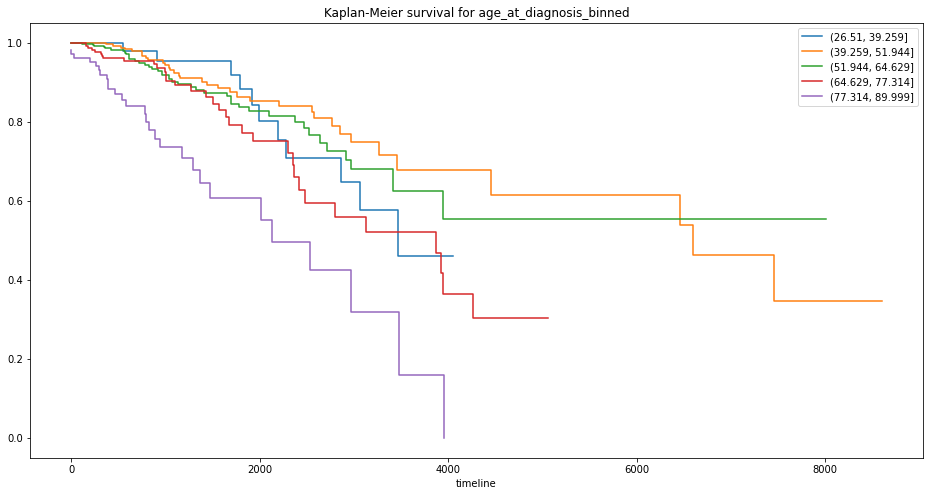

log-rank test for age_at_diagnosis_binned


<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 4
   events_observed = case_id
001cef41-ff86-4d3f-a140-a647ac4b10a1    0
0045349c-69d9-4306-a403-c9c1fa836644    0
00807dae-9f4a-4fd1-aac2-82eb11bf2afb    0
00a2d166-78c9-4687-a195-3d6315c27574    0
00b11ca8-8540-4a3d-b602-ec754b00230b    0
                                       ..
fe15c48b-116d-461e-9b40-68514730fd18    0
fe2cd610-aa52-4789-ac62-7683281bb22f    0
fe7f74b8-20f4-4471-91dc-4cca8c68e5c0    0
fec0da58-1047-44d2-b6d1-c18cceed43dc    0
ff0f875f-113a-4c0f-8c0a-4259cd496e6d    0
Name: observed_death, Length: 1081, dtype: int64
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
          42.80 <0.005     26.39

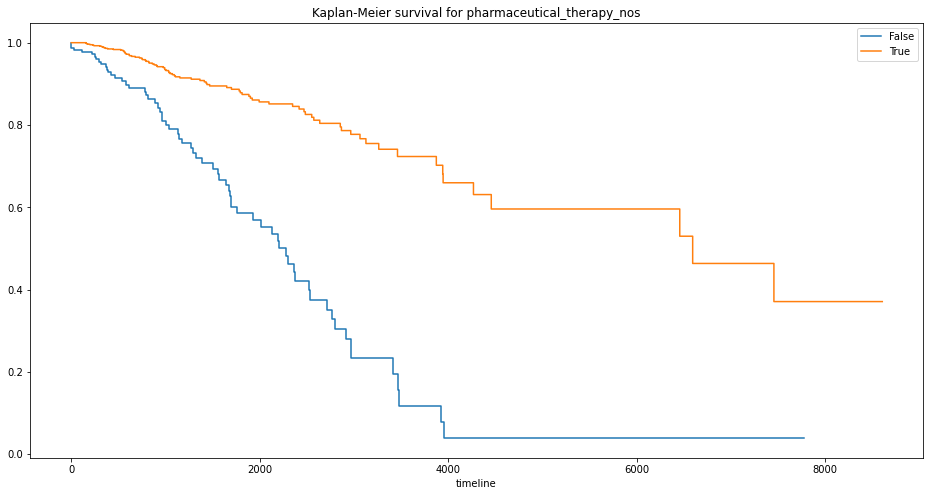

log-rank test for pharmaceutical_therapy_nos


<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
   events_observed = case_id
001cef41-ff86-4d3f-a140-a647ac4b10a1    0
0045349c-69d9-4306-a403-c9c1fa836644    0
00807dae-9f4a-4fd1-aac2-82eb11bf2afb    0
00a2d166-78c9-4687-a195-3d6315c27574    0
00b11ca8-8540-4a3d-b602-ec754b00230b    0
                                       ..
fe15c48b-116d-461e-9b40-68514730fd18    0
fe2cd610-aa52-4789-ac62-7683281bb22f    0
fe7f74b8-20f4-4471-91dc-4cca8c68e5c0    0
fec0da58-1047-44d2-b6d1-c18cceed43dc    0
ff0f875f-113a-4c0f-8c0a-4259cd496e6d    0
Name: observed_death, Length: 1081, dtype: int64
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
          38.85 <0.005     31.03

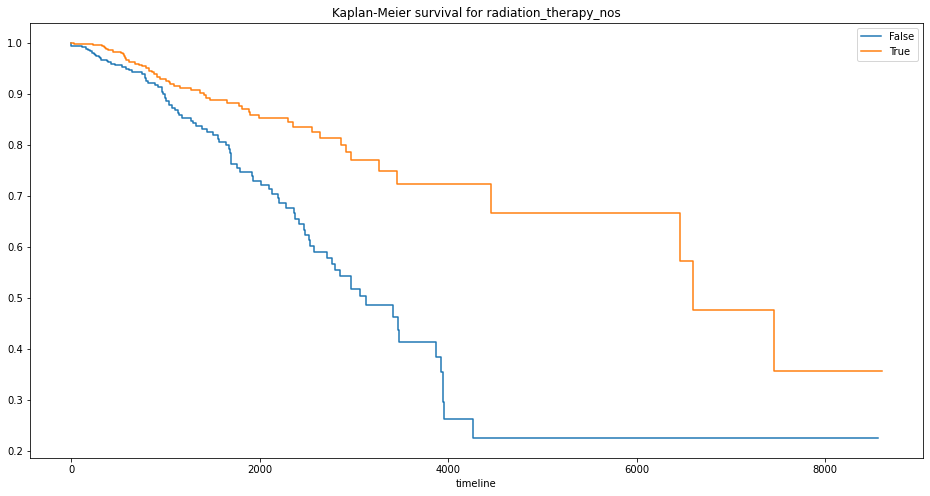

log-rank test for radiation_therapy_nos


<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
   events_observed = case_id
001cef41-ff86-4d3f-a140-a647ac4b10a1    0
0045349c-69d9-4306-a403-c9c1fa836644    0
00807dae-9f4a-4fd1-aac2-82eb11bf2afb    0
00a2d166-78c9-4687-a195-3d6315c27574    0
00b11ca8-8540-4a3d-b602-ec754b00230b    0
                                       ..
fe15c48b-116d-461e-9b40-68514730fd18    0
fe2cd610-aa52-4789-ac62-7683281bb22f    0
fe7f74b8-20f4-4471-91dc-4cca8c68e5c0    0
fec0da58-1047-44d2-b6d1-c18cceed43dc    0
ff0f875f-113a-4c0f-8c0a-4259cd496e6d    0
Name: observed_death, Length: 1081, dtype: int64
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
          18.14 <0.005     15.58

In [176]:
for feature in features_to_compare:
    basic_survival_analysis(data, feature)

# Cox regression

## Cox regression against age

In [156]:
cph = CoxPHFitter()
cph.fit(data[["survival_days", "observed_death", "age_at_diagnosis"]], duration_col="survival_days", event_col="observed_death", formula="age_at_diagnosis")
cph.print_summary()
cph.check_assumptions(data)

<lifelines.CoxPHFitter: fitted with 1081 total observations, 931 right-censored observations>
             duration col = 'survival_days'
                event col = 'observed_death'
      baseline estimation = breslow
   number of observations = 1081
number of events observed = 150
   partial log-likelihood = -839.62
         time fit was run = 2022-02-03 11:55:05 UTC

---
                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                
age_at_diagnosis   0.04       1.04       0.01             0.02             0.05                 1.02                 1.05

                    z      p   -log2(p)
covariate                              
age_at_diagnosis 5.63 <0.005      25.72
---
Concordance = 0.66
Partial AIC = 1681.23
log-likelihood ratio test = 32.06 on 1 df
-log2(p) of ll-ratio test = 25.99

Proportional hazard assumption looks okay.


[]

With `exp(coef)=1.04` we have a 4% increase in for the baseline hazard per year of `age_at_diagnosis`.

In [174]:
cph = CoxPHFitter()
features_ref = [
    "age_at_diagnosis",
    "pharmaceutical_therapy_nos",
    "radiation_therapy_nos",
]
data_to_fit = data[features_ref + ["survival_days", "observed_death"]]
cph.fit(data_to_fit, duration_col="survival_days", event_col="observed_death", formula="+".join(features_ref))
cph.check_assumptions(data)
cph.print_summary()

The ``p_value_threshold`` is set at 0.01. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 1081 total observations, 931 right-censored observations>
         test_name = proportional_hazard_test

---
                                         test_statistic      p  -log2(p)
age_at_diagnosis                   km              5.36   0.02      5.60
                                   rank           11.48 <0.005     10.47
pharmaceutical_therapy_nos[T.True] km              0.54   0.46      1.11
                                   rank            1.57   0.21      2.25
radiation_therapy_nos[T.True]      km              1.84   0.18      2.51
                                   rank            2.20   0.14      2.85



1. Variable 'age_at_diagnosis' failed the non-proportional test: p-value is 0.0007.

   Advice 1: the functional form of the variable 'age_at_diagnosis' might be incorrect. That is,
there may be non-linear terms missing. The proportional hazard test used is very sensitive to
incorrect functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'age_at_diagnosis' using pd.cut, and then specify it in
`strata=['age_at_diagnosis', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proporti

<lifelines.CoxPHFitter: fitted with 1081 total observations, 931 right-censored observations>
             duration col = 'survival_days'
                event col = 'observed_death'
      baseline estimation = breslow
   number of observations = 1081
number of events observed = 150
   partial log-likelihood = -811.68
         time fit was run = 2022-02-03 12:08:58 UTC

---
                                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                  
age_at_diagnosis                     0.02       1.02       0.01             0.01             0.04                 1.01                 1.04
pharmaceutical_therapy_nos[T.True]  -1.17       0.31       0.18            -1.53            -0.82                 0.22                 0.44
radiation_therapy_nos[T.True]       -0.40       0.67       0.18            -0.75            -0.05                 0.47                 0.95

                                       z      p   -log2(p)
covariate                                                 
age_at_diagnosis                    3.45 <0.005      10.80
pharmaceutical_therapy_nos[T.True] -6.48 <0.005      33.31
radiation_therapy_nos[T.True]      -2.23   0.03       5.27
---
Concordance = 0.68
Partial AIC = 1629.36
log-likelihood ratio test = 87.93 on 3 df
-log2(p) of ll-ratio test = 60.51

Taking into account warning

Proportional hazard assumption looks okay.


<lifelines.CoxPHFitter: fitted with 1081 total observations, 931 right-censored observations>
             duration col = 'survival_days'
                event col = 'observed_death'
                   strata = ['age_at_diagnosis_binned']
      baseline estimation = breslow
   number of observations = 1081
number of events observed = 150
   partial log-likelihood = -590.66
         time fit was run = 2022-02-03 12:07:22 UTC

---
                                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                  
pharmaceutical_therapy_nos[T.True]  -1.20       0.30       0.19            -1.57            -0.83                 0.21                 0.43
radiation_therapy_nos[T.True]       -0.32       0.73       0.18            -0.67             0.04                 0.51                 1.05

                                       z      p   -log2(p)
covariate                                                 
pharmaceutical_therapy_nos[T.True] -6.37 <0.005      32.27
radiation_therapy_nos[T.True]      -1.72   0.09       3.54
---
Concordance = 0.59
Partial AIC = 1185.32
log-likelihood ratio test = 51.51 on 2 df
-log2(p) of ll-ratio test = 37.16

<AxesSubplot:>

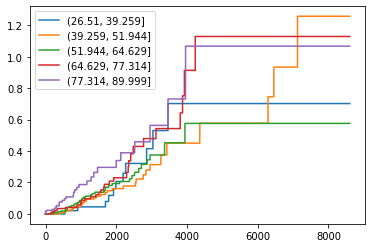

In [172]:
features_ref = [
    "pharmaceutical_therapy_nos",
    "radiation_therapy_nos",
]
strata = ["age_at_diagnosis_binned"]
data_to_fit = data[features_ref + strata + ["survival_days", "observed_death"]]

cph = CoxPHFitter()
cph.fit(
    data_to_fit,
    duration_col="survival_days",
    event_col="observed_death",
    formula="+".join(features_ref),
    strata=strata,
)
cph.check_assumptions(data)
cph.print_summary()
cph.baseline_cumulative_hazard_.plot(drawstyle="steps")
